<a href="https://colab.research.google.com/github/Kagoritze/BTCUSDT_Price_Chart/blob/main/BTCUSDT_Price_Chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

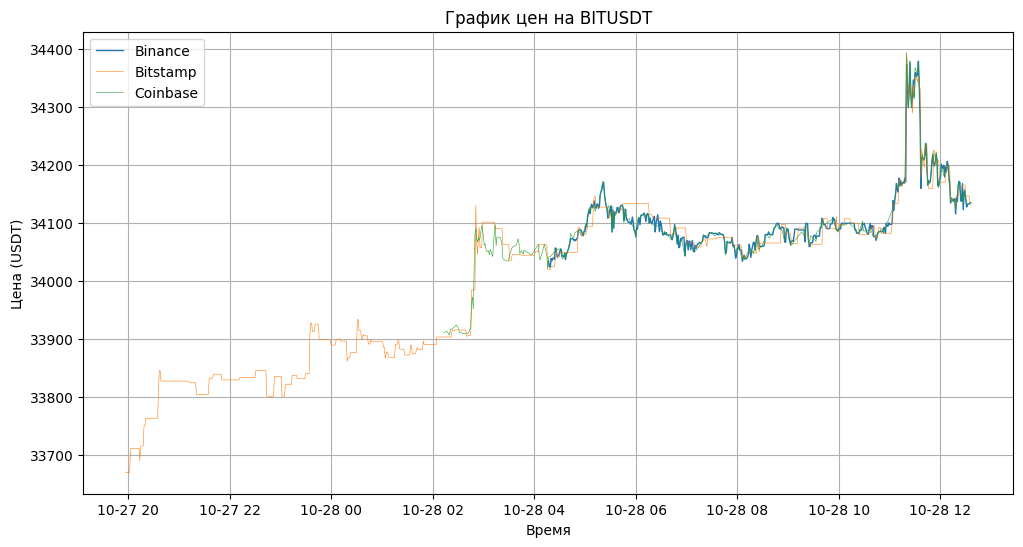

In [58]:
import ccxt
import matplotlib.pyplot as plt
import datetime

# Создание экземпляров бирж
binance = ccxt.binance()
bitstamp = ccxt.bitstamp()
coinbase = ccxt.coinbasepro()

# Настройка символа для пары торгов
symbol = 'BTC/USDT'

# Временной интервал (в 1 минуту)
timeframe = '1m'

# Получение исторических данных
binance_data = binance.fetch_ohlcv(symbol, timeframe)
bitstamp_data = bitstamp.fetch_ohlcv(symbol, timeframe)
coinbase_data = coinbase.fetch_ohlcv(symbol, timeframe)

# Распаковка данных
binance_timestamps = [x[0] for x in binance_data]
binance_prices = [x[4] for x in binance_data]

bitstamp_timestamps = [x[0] for x in bitstamp_data]
bitstamp_prices = [x[4] for x in bitstamp_data]

coinbase_timestamps = [x[0] for x in coinbase_data]
coinbase_prices = [x[4] for x in coinbase_data]

# Преобразование временных меток в читаемый формат
binance_dates = [datetime.datetime.fromtimestamp(ts / 1000) for ts in binance_timestamps]
bitstamp_dates = [datetime.datetime.fromtimestamp(ts / 1000) for ts in bitstamp_timestamps]
coinbase_dates = [datetime.datetime.fromtimestamp(ts / 1000) for ts in coinbase_timestamps]

# Создание графика
plt.figure(figsize=(12, 6))
plt.plot(binance_dates, binance_prices, label='Binance', linewidth=1)
plt.plot(bitstamp_dates, bitstamp_prices, label='Bitstamp', linewidth=0.4)
plt.plot(coinbase_dates, coinbase_prices, label='Coinbase', linewidth=0.4)
plt.title('График цен на BITUSDT')
plt.xlabel('Время')
plt.ylabel('Цена (USDT)')
plt.legend()
plt.grid(True)

# Отображение графика
plt.show()